In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import torch.nn as nn
import torch.optim as optim



In [13]:
df = pd.read_csv('./data.csv')
print(df)

    Accuracy(%)  Avg. Reaction Time(s)  Satisfactory performence (0/1)
0          92.3                   1.98                               1
1         100.0                   2.32                               1
2          98.0                   1.85                               1
3          96.3                   1.35                               1
4         100.0                   1.80                               1
5          81.0                   2.26                               0
6          87.9                   1.56                               0
7          89.0                   1.90                               0
8          85.0                   2.11                               0
9          88.7                   2.43                               0
10         89.4                   1.43                               0
11         94.7                   1.24                               1
12         92.3                   1.58                               1
13    

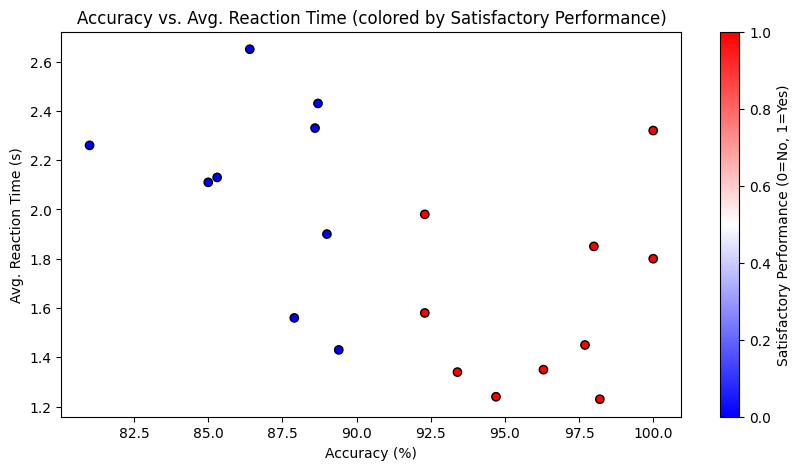

In [14]:

plt.figure(figsize=(10, 5))
plt.scatter(df['Accuracy(%)'], df['Avg. Reaction Time(s)'], 
            c=df['Satisfactory performence (0/1)'], cmap='bwr', edgecolor='k')
plt.xlabel('Accuracy (%)')
plt.ylabel('Avg. Reaction Time (s)')
plt.title('Accuracy vs. Avg. Reaction Time (colored by Satisfactory Performance)')
plt.colorbar(label='Satisfactory Performance (0=No, 1=Yes)')
plt.show()

In [15]:

features = {}

features['mean_accuracy'] = df['Accuracy(%)'].mean()
features['std_accuracy'] = df['Accuracy(%)'].std()
features['min_accuracy'] = df['Accuracy(%)'].min()
features['max_accuracy'] = df['Accuracy(%)'].max()
features['median_accuracy'] = df['Accuracy(%)'].median()
features['skew_accuracy'] = df['Accuracy(%)'].skew()
features['kurtosis_accuracy'] = df['Accuracy(%)'].kurtosis()
features['25th_percentile_accuracy'] = df['Accuracy(%)'].quantile(0.25)
features['75th_percentile_accuracy'] = df['Accuracy(%)'].quantile(0.75)
features['iqr_accuracy'] = features['75th_percentile_accuracy'] - features['25th_percentile_accuracy']


features['mean_reaction_time'] = df['Avg. Reaction Time(s)'].mean()
features['std_reaction_time'] = df['Avg. Reaction Time(s)'].std()
features['min_reaction_time'] = df['Avg. Reaction Time(s)'].min()
features['max_reaction_time'] = df['Avg. Reaction Time(s)'].max()
features['median_reaction_time'] = df['Avg. Reaction Time(s)'].median()
features['skew_reaction_time'] = df['Avg. Reaction Time(s)'].skew()
features['kurtosis_reaction_time'] = df['Avg. Reaction Time(s)'].kurtosis()
features['25th_percentile_reaction_time'] = df['Avg. Reaction Time(s)'].quantile(0.25)
features['75th_percentile_reaction_time'] = df['Avg. Reaction Time(s)'].quantile(0.75)
features['iqr_reaction_time'] = features['75th_percentile_reaction_time'] - features['25th_percentile_reaction_time']


for key, value in features.items():
    print(f"{key.replace('_', ' ').capitalize()}: {value:.2f}")

Mean accuracy: 91.80
Std accuracy: 5.59
Min accuracy: 81.00
Max accuracy: 100.00
Median accuracy: 92.30
Skew accuracy: -0.08
Kurtosis accuracy: -0.97
25th percentile accuracy: 88.25
75th percentile accuracy: 97.00
Iqr accuracy: 8.75
Mean reaction time: 1.84
Std reaction time: 0.44
Min reaction time: 1.23
Max reaction time: 2.65
Median reaction time: 1.85
Skew reaction time: 0.17
Kurtosis reaction time: -1.23
25th percentile reaction time: 1.44
75th percentile reaction time: 2.19
Iqr reaction time: 0.75


In [16]:

X = df[['Accuracy(%)', 'Avg. Reaction Time(s)']]
y = df['Satisfactory performence (0/1)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



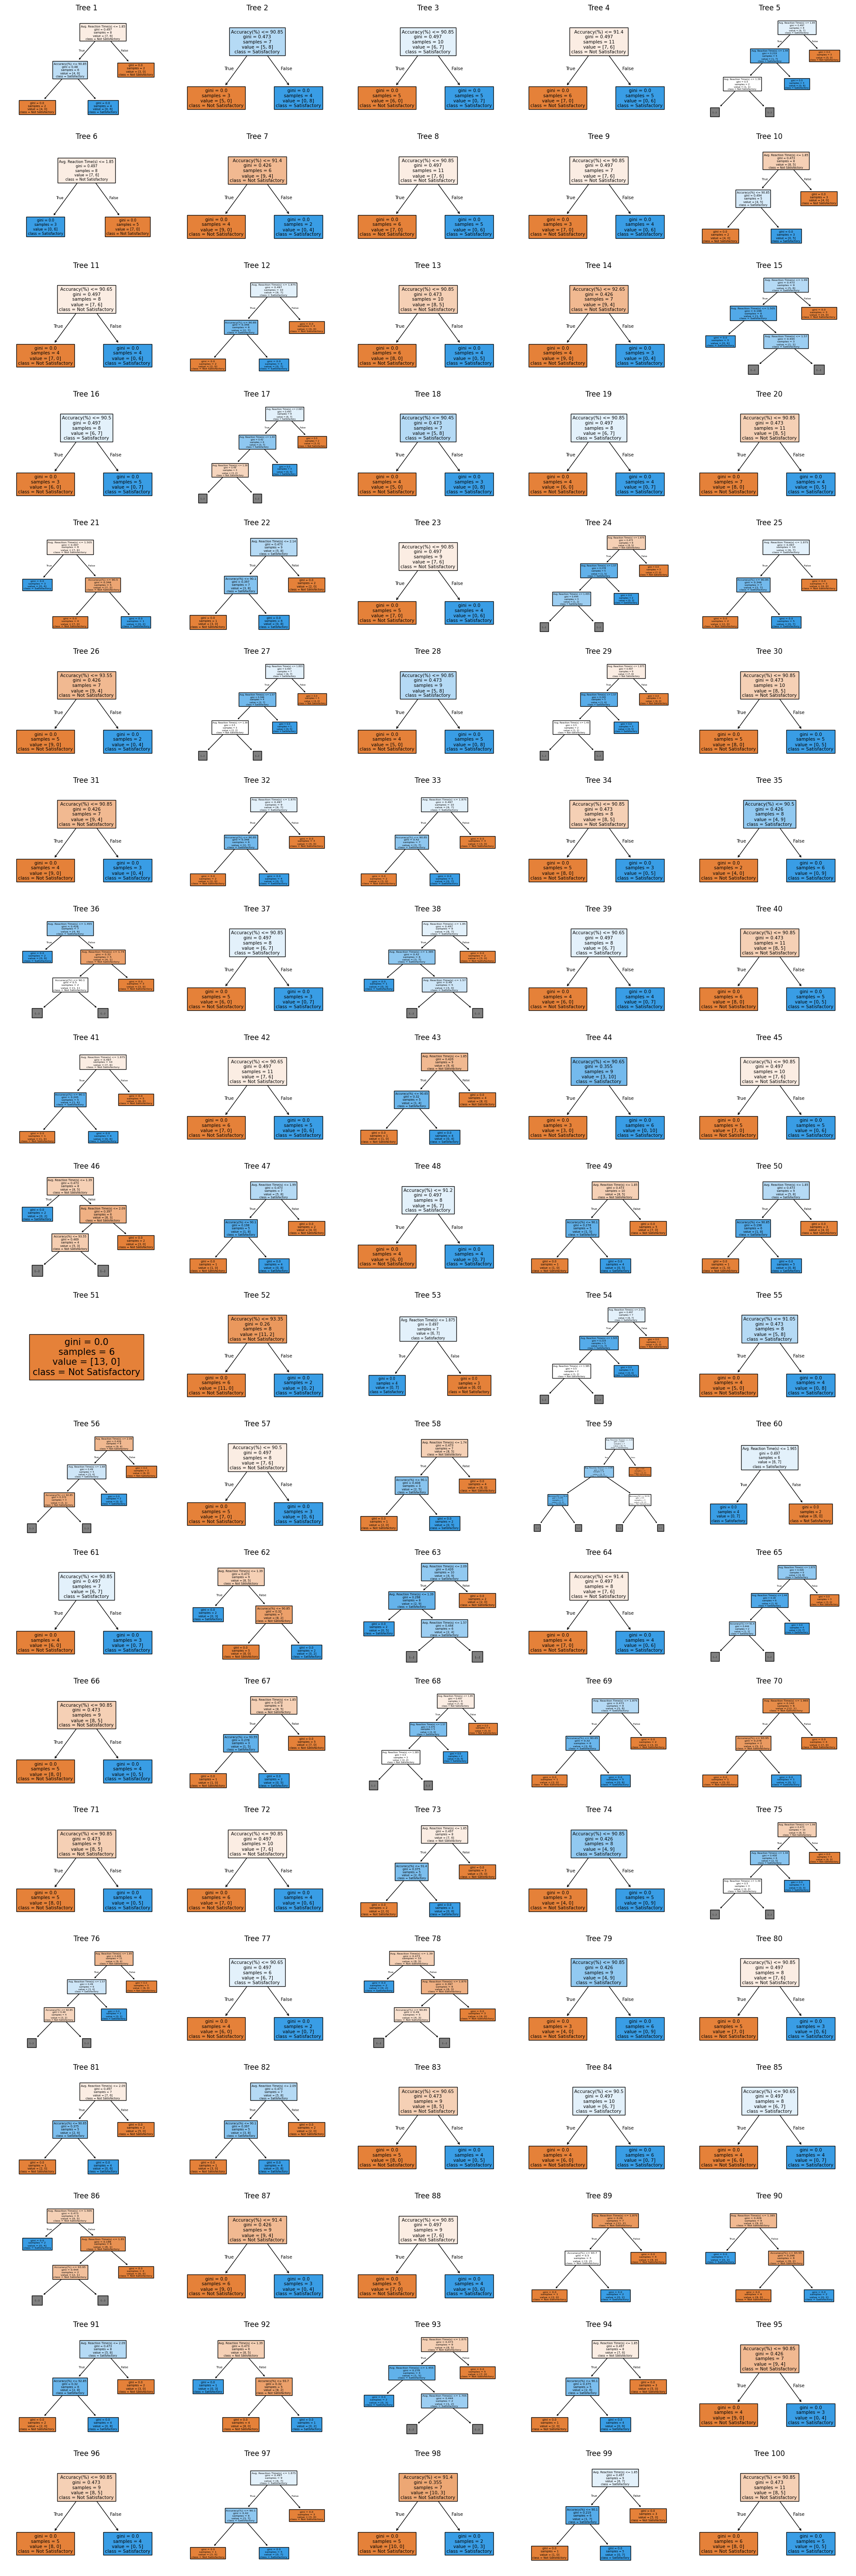

In [17]:

n_trees = len(rf.estimators_)
n_cols = 5
n_rows = (n_trees + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, tree in enumerate(rf.estimators_):
    plot_tree(tree, feature_names=X.columns, class_names=['Not Satisfactory', 'Satisfactory'],
              filled=True, ax=axes[i], max_depth=2)
    axes[i].set_title(f'Tree {i+1}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

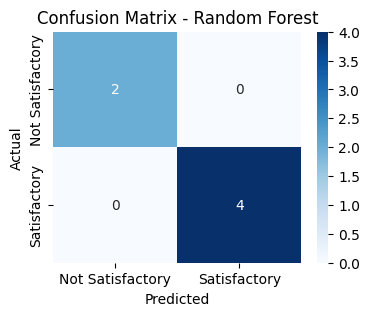

In [18]:


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfactory', 'Satisfactory'], yticklabels=['Not Satisfactory', 'Satisfactory'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [19]:

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



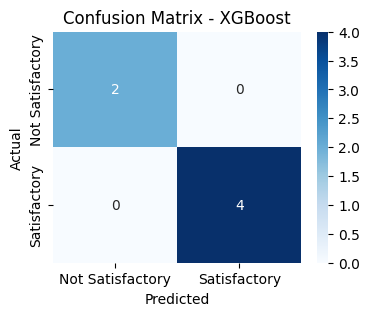

In [20]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfactory', 'Satisfactory'], yticklabels=['Not Satisfactory', 'Satisfactory'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [21]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()


model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).round().squeeze().numpy()

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



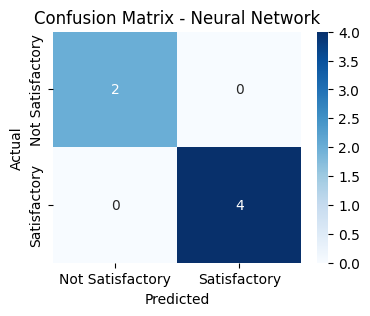

In [22]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Satisfactory', 'Satisfactory'],
            yticklabels=['Not Satisfactory', 'Satisfactory'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()